**Import Libraries**

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve, auc)
from sklearn.model_selection import cross_val_score, GridSearchCV

# Set random seed for reproducibility
np.random.seed(42)

# Set display options
pd.set_option('display.max_columns', None)
# Use a valid seaborn style available in matplotlib
# You can check available styles with plt.style.available
plt.style.use('seaborn-v0_8-darkgrid') # Changed from 'seaborn'

 **1. Data Loading and Exploration**

In [4]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nData information:")
print(df.info())

print("\nSummary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check class distribution
print("\nOutcome distribution:")
print(df['Outcome'].value_counts(normalize=True))

Dataset shape: (768, 9)

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Summary statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outcome distribution:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


**2. Data Preprocessing**

In [5]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier feature selection
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))


Training set shape: (614, 8)
Test set shape: (154, 8)

Class distribution in training set:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64

Class distribution in test set:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


**3. Exploratory Data Analysis**

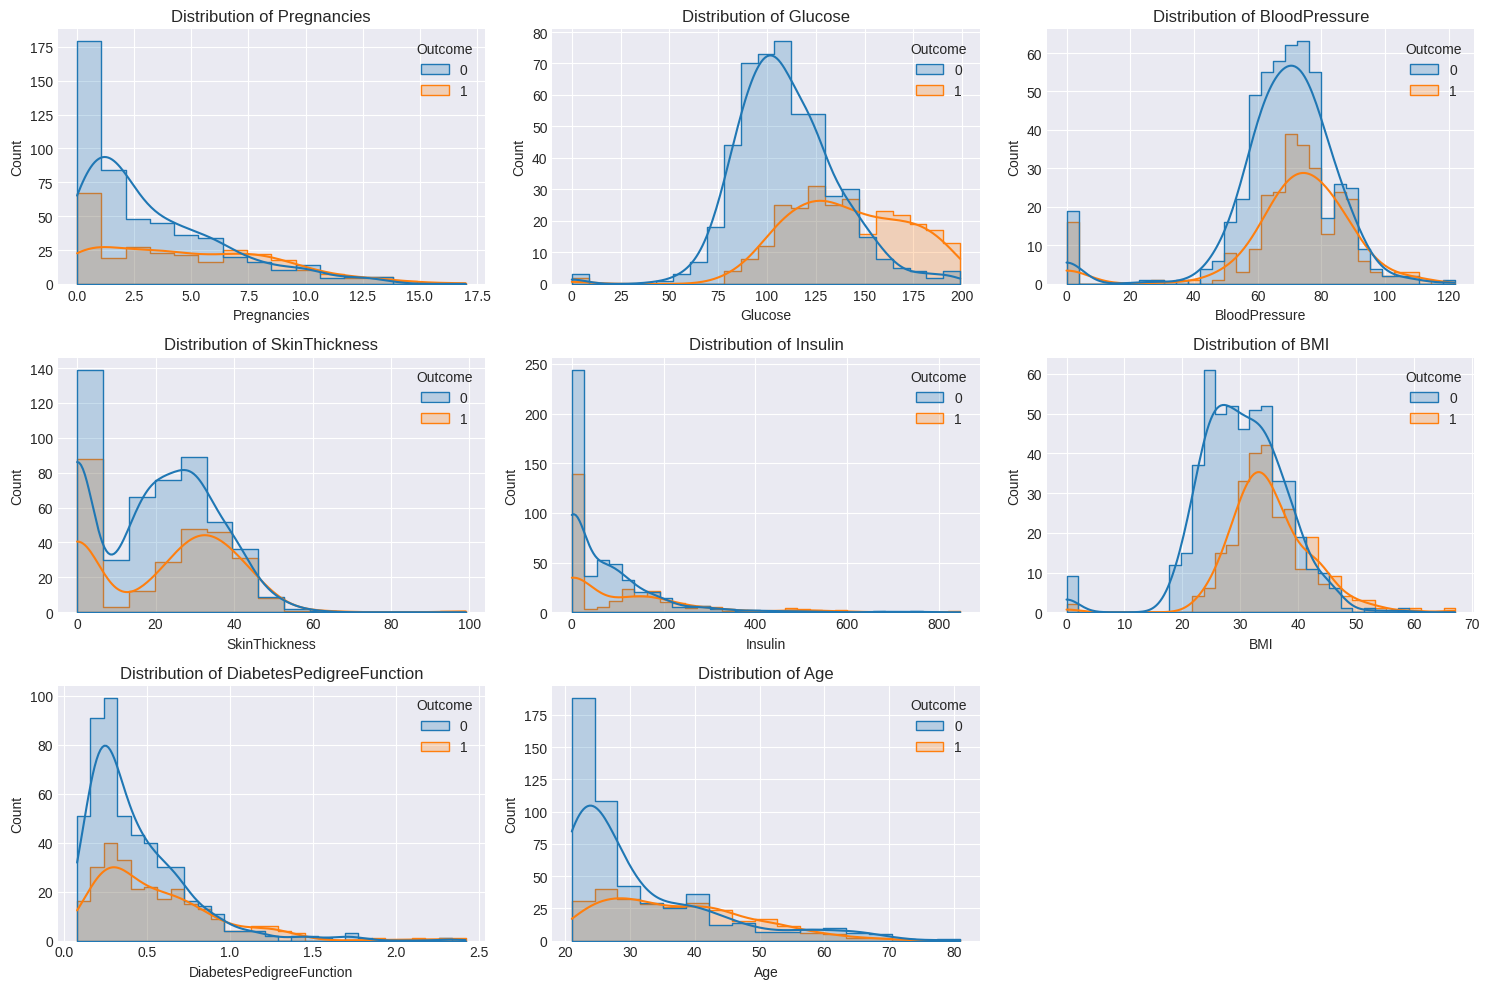

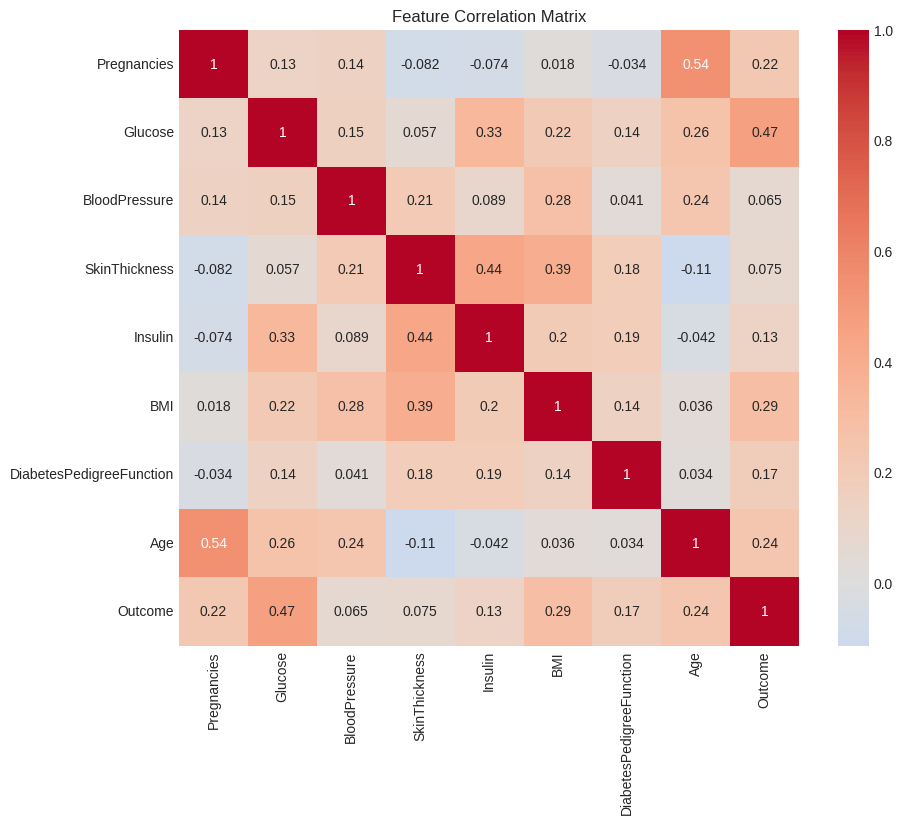

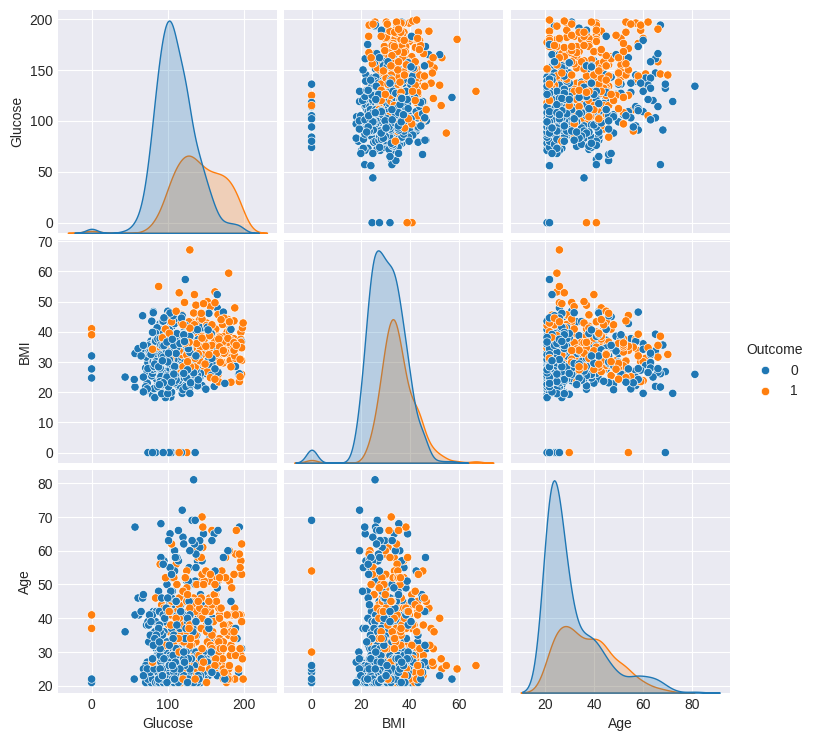

In [6]:
# Plot feature distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=col, hue='Outcome', kde=True, element='step')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()

# Pairplot of selected features
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.show()

**4. Feature Selection**

Selected features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Feature importance scores:


,Feature,Score
1,Glucose,182.554724
5,BMI,61.159924
7,Age,37.629617
0,Pregnancies,27.722942
6,DiabetesPedigreeFunction,17.194683
4,Insulin,16.957174
3,SkinThickness,5.431117
2,BloodPressure,4.181986


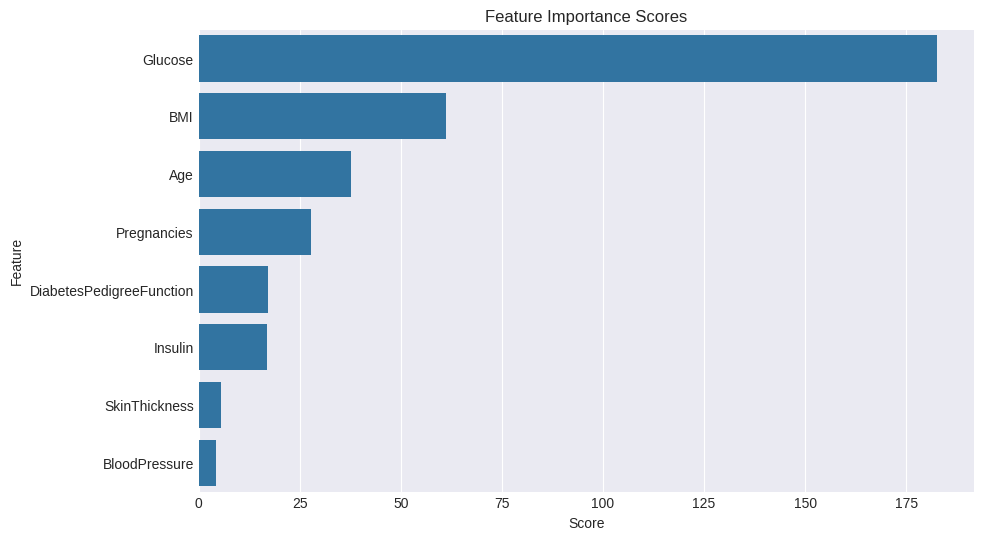

In [7]:
# Select top 5 features using SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Feature scores
feature_scores = pd.DataFrame({'Feature': X_train.columns,
                              'Score': selector.scores_})
feature_scores = feature_scores.sort_values('Score', ascending=False)
print("\nFeature importance scores:")
display(feature_scores)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title("Feature Importance Scores")
plt.show()

# Transform datasets to keep only selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

**5. Model Training and Evaluation**


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



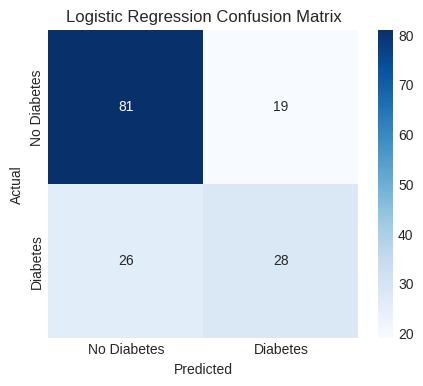


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



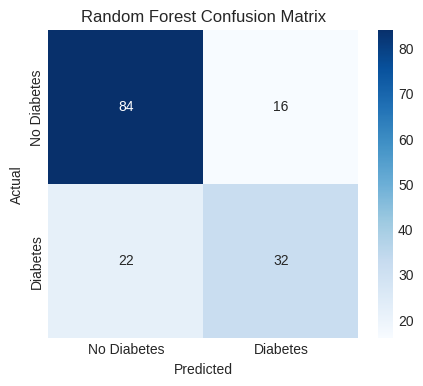


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.65      0.44      0.53        54

    accuracy                           0.72       154
   macro avg       0.70      0.66      0.66       154
weighted avg       0.71      0.72      0.71       154



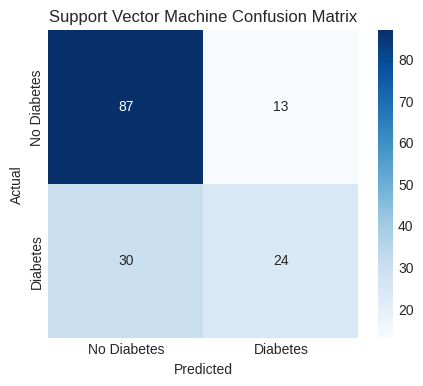


Model Performance Comparison:


,accuracy,precision,recall,f1,roc_auc
Random Forest,0.753247,0.666667,0.592593,0.627451,0.811944
Logistic Regression,0.707792,0.595745,0.518519,0.554455,0.811481
Support Vector Machine,0.720779,0.648649,0.444444,0.527473,0.784630


In [8]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_selected, y_train)

    # Make predictions
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_prob': y_prob
    }

    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Compare model performance
performance_df = pd.DataFrame.from_dict(results, orient='index')[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
print("\nModel Performance Comparison:")
display(performance_df.sort_values('roc_auc', ascending=False))

**6. Hyperparameter Tuning for Best Model**

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



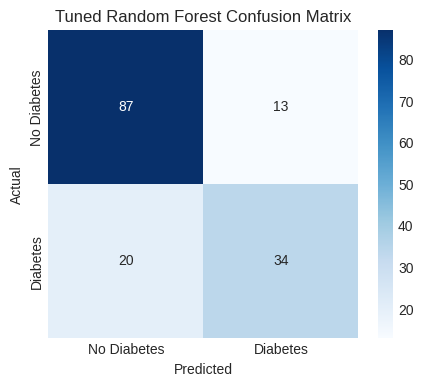

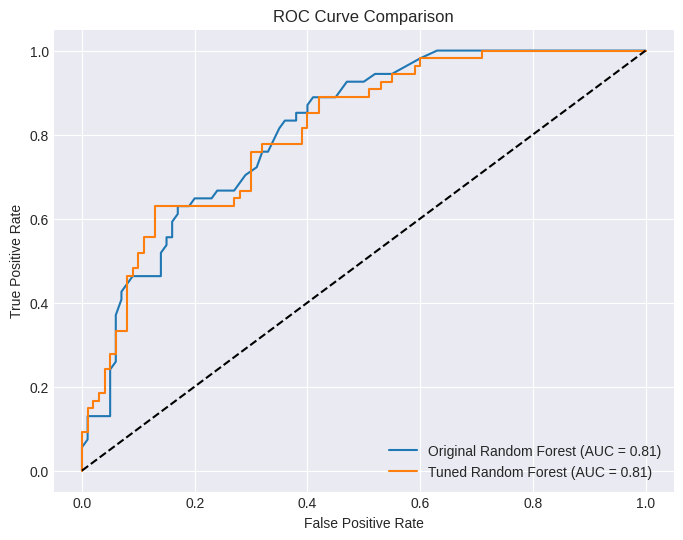

In [9]:
# Select best model based on ROC AUC
best_model_name = performance_df['roc_auc'].idxmax()
best_model = results[best_model_name]['model']

# Define parameter grid based on model type
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
else:  # SVM
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'linear']
    }

# Perform grid search
grid_search = GridSearchCV(estimator=best_model,
                          param_grid=param_grid,
                          cv=5,
                          scoring='roc_auc',
                          n_jobs=-1,
                          verbose=1)

grid_search.fit(X_train_selected, y_train)

# Get best model
tuned_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_tuned = tuned_model.predict(X_test_selected)
y_prob_tuned = tuned_model.predict_proba(X_test_selected)[:, 1]

print("\nBest parameters:", grid_search.best_params_)
print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))

# Confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f"Tuned {best_model_name} Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve comparison
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, results[best_model_name]['y_prob'])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Original {best_model_name} (AUC = {roc_auc:.2f})')

fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned {best_model_name} (AUC = {roc_auc_tuned:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

**7. Feature Importance Analysis**

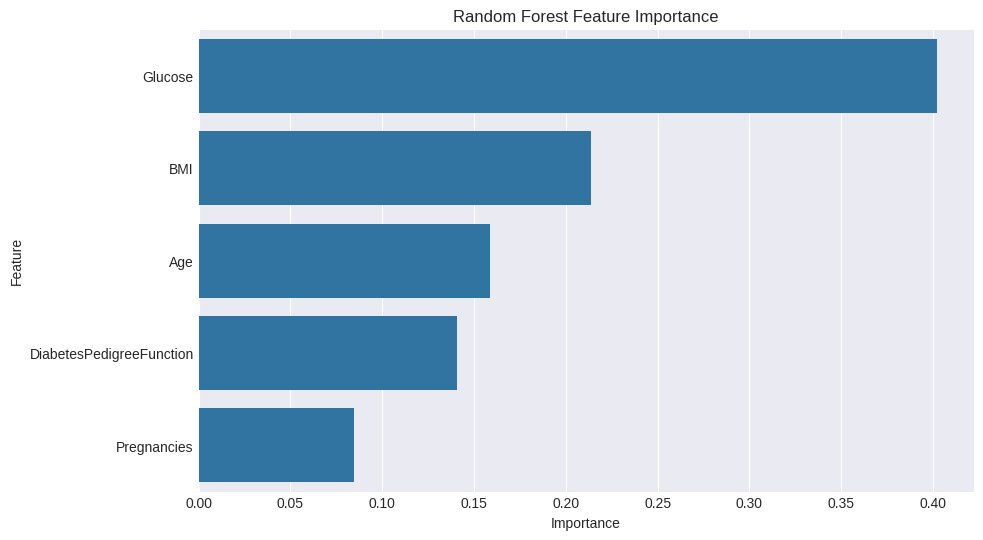

In [10]:
# Feature importance for Random Forest
if best_model_name == 'Random Forest':
    importances = tuned_model.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title("Random Forest Feature Importance")
    plt.show()

# Coefficients for Logistic Regression
elif best_model_name == 'Logistic Regression':
    coefficients = pd.DataFrame({
        'Feature': selected_features,
        'Coefficient': tuned_model.coef_[0]
    }).sort_values('Coefficient', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coefficients)
    plt.title("Logistic Regression Coefficients")
    plt.show()

**8. Cross Validation and Final Evolution**

In [11]:
# Cross-validation for the tuned model
cv_scores = cross_val_score(tuned_model,
                          X_train_selected,
                          y_train,
                          cv=5,
                          scoring='roc_auc')

print(f"\nCross-validation ROC AUC scores for tuned {best_model_name}: {cv_scores}")
print(f"Mean CV ROC AUC: {cv_scores.mean():.2f} (±{cv_scores.std():.2f})")

# Final evaluation on test set
final_accuracy = accuracy_score(y_test, y_pred_tuned)
final_precision = precision_score(y_test, y_pred_tuned)
final_recall = recall_score(y_test, y_pred_tuned)
final_f1 = f1_score(y_test, y_pred_tuned)
final_roc_auc = roc_auc_score(y_test, y_prob_tuned)

print("\nFinal Model Performance on Test Set:")
print(f"Accuracy: {final_accuracy:.3f}")
print(f"Precision: {final_precision:.3f}")
print(f"Recall: {final_recall:.3f}")
print(f"F1 Score: {final_f1:.3f}")
print(f"ROC AUC: {final_roc_auc:.3f}")


Cross-validation ROC AUC scores for tuned Random Forest: [0.8002907  0.86744186 0.80581395 0.84389535 0.86696429]
Mean CV ROC AUC: 0.84 (±0.03)

Final Model Performance on Test Set:
Accuracy: 0.786
Precision: 0.723
Recall: 0.630
F1 Score: 0.673
ROC AUC: 0.808


**9. Conclusion and Model Deployment**

In [12]:
# Save the final model
import joblib

# Create a dictionary with model and metadata
model_package = {
    'model': tuned_model,
    'scaler': scaler,
    'feature_selector': selector,
    'selected_features': list(selected_features),
    'performance': {
        'accuracy': final_accuracy,
        'precision': final_precision,
        'recall': final_recall,
        'f1': final_f1,
        'roc_auc': final_roc_auc
    }
}

# Save the model package
joblib.dump(model_package, 'diabetes_classifier.pkl')

print("\nModel saved successfully as 'diabetes_classifier.pkl'")


Model saved successfully as 'diabetes_classifier.pkl'
